In [1]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount("/content/gdrive")

In [2]:
%cd /content/gdrive/My Drive/GitHub/img-gen

[Errno 2] No such file or directory: '/content/gdrive/My Drive/GitHub/img-gen'
/Users/jules/workspace/img-gen


In [3]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing img_gen.egg-info/PKG-INFO
writing dependency_links to img_gen.egg-info/dependency_links.txt
writing top-level names to img_gen.egg-info/top_level.txt
reading manifest file 'img_gen.egg-info/SOURCES.txt'
writing manifest file 'img_gen.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-10.9-x86_64/egg
running install_lib
running build_py
copying img_gen/cycle_gan.py -> build/lib/img_gen
creating build/bdist.macosx-10.9-x86_64/egg
creating build/bdist.macosx-10.9-x86_64/egg/img_gen
copying build/lib/img_gen/gan.py -> build/bdist.macosx-10.9-x86_64/egg/img_gen
copying build/lib/img_gen/models.py -> build/bdist.macosx-10.9-x86_64/egg/img_gen
copying build/lib/img_gen/__init__.py -> build/bdist.macosx-10.9-x86_64/egg/img_gen
copying build/lib/img_gen/img.py -> build/bdist.macosx-10.9-x86_64/egg/img_gen
copying build/lib/img_gen/cycle_gan.py -> build/bdist.macosx-10.9-x86_64/egg/img_gen
copying build/lib/img_gen/stora

In [4]:
%pip install tensorflow_addons

You should consider upgrading via the '/Users/jules/Library/Caches/pypoetry/virtualenvs/img-gen-JnbHLy0k-py3.8/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
# import tensorflow_cloud as tfc

# GCP_BUCKET = "img-gen-training"

# tfc.run(
#     docker_image_bucket_name=GCP_BUCKET,
#     requirements_txt="requirements.txt",
#     stream_logs=True,
# )

In [6]:
import tensorflow_datasets as tfds

# load the data set
data, metadata = tfds.load(
    "cycle_gan/monet2photo",
    with_info=True,
    as_supervised=True,
)

train_x, train_y = data["trainA"], data["trainB"]
test_x, test_y = data["testA"], data["testB"]

In [7]:
# preprocess data

from img_gen.img import preprocess_images

train_x = preprocess_images(train_x, jitter=True)
train_y = preprocess_images(train_y, jitter=True)
test_x = preprocess_images(test_x)
test_y = preprocess_images(test_y)

In [8]:
# build model

from img_gen.cycle_gan import CycleGAN

cyc_gan = CycleGAN(
    show_images=False,
    use_cloud=True,
    save_images=True,
    save_models=True,
    name="monet2photo",
    cloud_bucket="img-gen-training",
)

In [9]:
# train
cyc_gan.train(train_x, train_y, test_x, test_y, checkpoints=False)

/Users/jules/Library/Caches/pypoetry/virtualenvs/img-gen-JnbHLy0k-py3.8/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


saving figure
epoch: 0 .......

SystemError: <built-in function len> returned a result with an error set

In [ ]:
cyc_gan.print_losses()
cyc_gan.plot_losses()

IndexError: list index out of range

Test Results


/Users/jules/Library/Caches/pypoetry/virtualenvs/img-gen-JnbHLy0k-py3.8/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


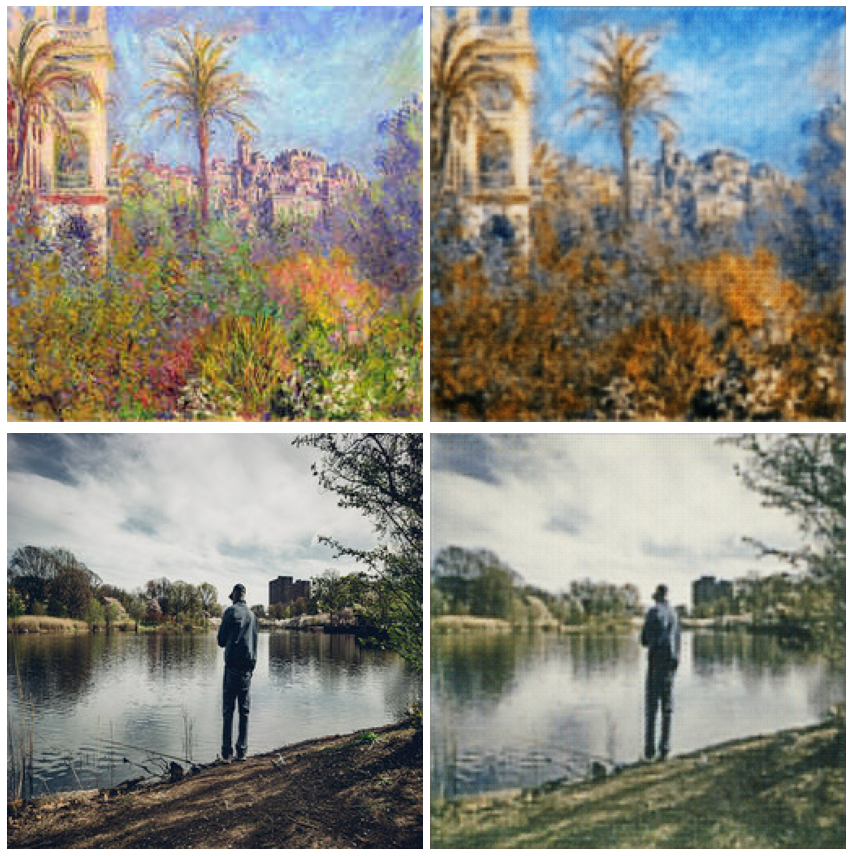

In [ ]:
print("Test Results")
cyc_gan.generate_images(test_x, test_y)

In [ ]:
gen_g_loss, gen_f_loss, dis_x_loss, dis_y_loss = cyc_gan.scores(test_x, test_y)
print("Test Losses")
print(f"gen_g: {gen_g_loss}, gen_f: {gen_f_loss}, dis_x: {dis_x_loss}, dis_y: {dis_y_loss}")